## Bagging and Boosting 

### TOC:
* [Random Forest](#JoshStarmerRandomForestP1)
* [ADABoost - Adaptive Boosting](#adaboost001)
* [Decision Trees](#decissiontrees001)
* [Gradient Boost](#gradientboost001)
* [XG Boost](#xgboosting001)

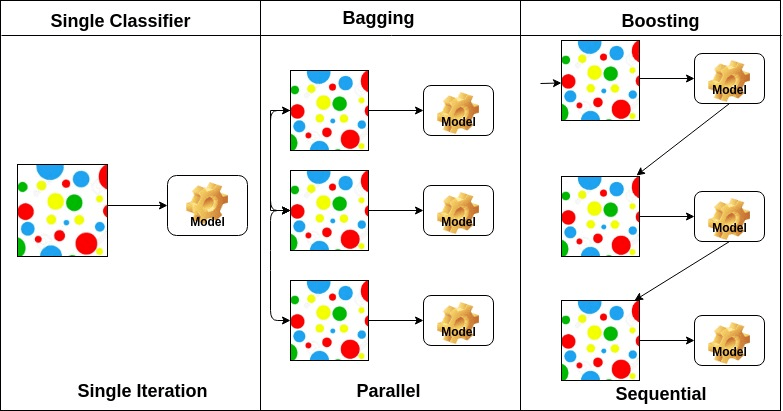

##### [Josh Starmer RandomForest P1](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ)<br>
<a id='JoshStarmerRandomForestP1'></a>


[Berkley Random forest in detail](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm)

__Features of Random Forest__
1. It is unexcelled in accuracy among current algorithms.
2. It runs efficiently on large data bases.
3. It can handle thousands of input variables without variable deletion.
4. It gives estimates of what variables are important in the classification.
5. It generates an internal unbiased estimate of the generalization error as the forest building progresses.
6. It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing.
7. It has methods for balancing error in class population unbalanced data sets.
8. Generated forests can be saved for future use on other data.
9. Prototypes are computed that give information about the relation between the variables and the classification.
10. It computes proximities between pairs of cases that can be used in clustering, locating outliers, or (by scaling) give interesting views of the data.
11. The capabilities of the above can be extended to unlabeled data, leading to unsupervised clustering, data views and outlier detection.
12. It offers an experimental method for detecting variable interactions.

[Josh Starmer RF P1](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ)<br>
[Josh Starmer RF Missing data](https://www.youtube.com/watch?v=nyxTdL_4Q-Q)

__Hyper parameters__
1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
5.  min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)

The out-of-bag (oob) error estimate


##### [Adaboost Josh Starmer](https://www.youtube.com/watch?v=LsK-xG1cLYA) - with decision trees
<a id='adaboost001'></a>


> Three important ideas
1. Forest of stumps. Stumps are basically one node and two leaves. Adaboost combines a lot of weak learners to make classifications. 
2. Unlike random forest, where all trees carry similar weight, Adaboost stumps carry differnt weights. So some stumps get more say in the classification than others. 
3. Each stump is made by considering the errors of the previous stump. 



1. Lets consider there are 8 data points, Adaboost gives sample weight to all the 8 points and that is 1/8. 
2. For each feature, a stump a created and gini index is calculated. The stump with the lowest gini index is the first stump of the forest. 
3. Now we determind how much say this stump has in the final say. Error for data point if 8 data points then its 1/8. Total Error wil be 0 to 1. 
4. The amount of say for each stump is $$AmountOfSay =\frac{1}{2} * log{\frac{(1- Total Error)} {Total Error}}{}$$
5. Next each  __sample weight__ is modified so that the next stump will consider th errors made by previous stump and learn.
6. We increase the sample weight for wrong predictions and decrease the sample weight for right predictions.
7. Each data point label wrongly predicted by the stump, that sample weight will be updated with the below formula.
$$ NewSampleWeightWRONG = SampleWeight*e^{AOS}$$ <br>
$$ NewSampleWeightRIGHT = SampleWeight*e^{-AOS}$$ 
8. Now that all sample weights are updated, we normalise the sample weights. We divide each sample weight  by sum of the total sample weight to normalize. 
9. The same process repeats. But this time a bootstrapped dataset is created, with the same size as original. We then pick a random number between 0 and 1, then we selected new samples based on this new random numbers. 
10. In the bootsrapped dataset, for samples which are duplicated. 
11. The same process continues for n trees. 
12. How a forest of stumps make a classification:
13. For a new sample we run through n stumps. We then sum up the AOS for stumps of each class. For example out of 100 stumps if 40 stumps say yes then we sum up the AOS for example 4.6, the same for no the sum is 7.56. The highest one is no we classify as no.  

In [28]:
## AmountOfSay =\frac{1}{2} * log{\frac{(1- Total Error)} {Total Error}}{}
## NewSampleWeight = SampleWeight*e^{AOS}

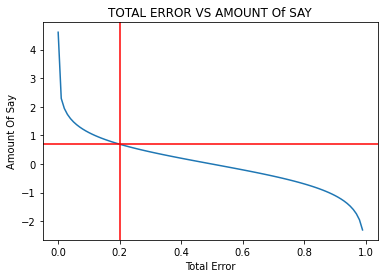

In [27]:
## TOTAL ERROR PLOT
import math
import matplotlib.pyplot as plt
%matplotlib inline
def drange(start, stop, step):
    r = start
    while r < stop:
        yield r
        r += step

total_error=list(drange(0.0001, 0.99999999999999999999, 0.01)) ## 0 and 1 cause errors, so approx used
## In the algorithm a small error term is added to that this equation doesn't freak out.  

# display(total_error)

amount_of_say = [0.5*math.log(((1-i)/i)) for i in total_error]

# display(amount_of_say)
err = 0.2
plt.plot(total_error, amount_of_say)
plt.title("TOTAL ERROR VS AMOUNT Of SAY")
plt.xlabel("Total Error")
plt.ylabel("Amount Of Say")

plt.axhline(y=(0.5*math.log(((1-err)/err))), color='r', linestyle='-')
plt.axvline(x=err, color='r', linestyle='-')

plt.show()

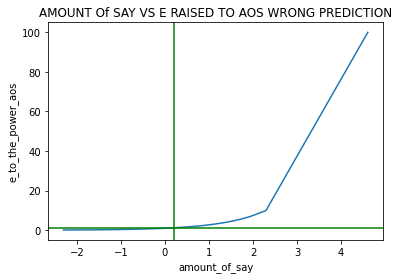

The new sample weight will be 0.125 * 1.221  = 0.1527. 
This weight is greater than the older weight. So when the there is a wrong prediction sample weight increases


In [46]:
e_to_the_power_aos = [math.exp(i)  for i in amount_of_say]

err = 0.2
plt.plot(amount_of_say, e_to_the_power_aos)
plt.title("AMOUNT Of SAY VS E RAISED TO AOS WRONG PREDICTION")
plt.xlabel("amount_of_say")
plt.ylabel("e_to_the_power_aos")

plt.axhline(y=math.exp(err), color='g', linestyle='-')
plt.axvline(x=err, color='g', linestyle='-')

plt.show()

print("The new sample weight will be {} * {}  = {}. \nThis weight is greater than the \
older weight. So when the there is a wrong prediction sample \
weight increases".format(1/8,round(math.exp(err),3), round(math.exp(err)*1/8,4)))

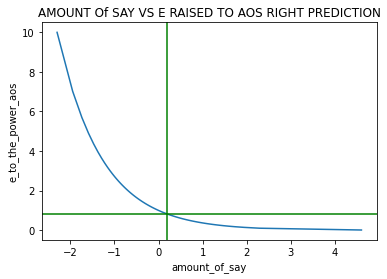

The new sample weight will be 0.125 * 0.819  = 0.1023. 
This weight is less than the older weight. So when the there is a right prediction sample weight decreases


In [47]:
e_to_the_power_aos = [math.exp(-i)  for i in amount_of_say]

err = 0.2
plt.plot(amount_of_say, e_to_the_power_aos)
plt.title("AMOUNT Of SAY VS E RAISED TO AOS RIGHT PREDICTION")
plt.xlabel("amount_of_say")
plt.ylabel("e_to_the_power_aos")

plt.axhline(y=math.exp(-err), color='g', linestyle='-')
plt.axvline(x=err, color='g', linestyle='-')

plt.show()

print("The new sample weight will be {} * {}  = {}. \nThis weight is less than the \
older weight. So when the there is a right prediction sample \
weight decreases".format(1/8,round(math.exp(-err),3), round(math.exp(-err)*1/8,4)))

In [58]:
import pandas as pd
sam_wei_ini = [0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]
## for the stump if data point is error or not
error = [0,0,0,0,0,0,1,0]
## for error we increase the sample weight
## for good prediction sample weight is decreased
sam_wei_new = [0.105,0.105,0.105,0.105,0.105,0.105,0.195,0.105]
sum_of_new_weigths = sum(sam_wei_new)

sam_wei_normalized = [i/sum_of_new_weigths for i in sam_wei_new]

df = pd.DataFrame({"sample_weight_initia":sam_wei_ini, "error_flag": error, "sample_wight_new" : sam_wei_new,\
                  "sam_wei_normalized":sam_wei_normalized})
display(df)
print("Sum of new sample weights after normalization is {}".format(sum(sam_wei_normalized)))

,sample_weight_initia,error_flag,sample_wight_new,sam_wei_normalized
0,0.125,0,0.105,0.112903
1,0.125,0,0.105,0.112903
2,0.125,0,0.105,0.112903
3,0.125,0,0.105,0.112903
4,0.125,0,0.105,0.112903
5,0.125,0,0.105,0.112903
6,0.125,1,0.195,0.209677
7,0.125,0,0.105,0.112903


Sum of new sample weights after normalization is 1.0


1. __sample_weight_initia__ - This is the inital sample weight, which is similar across all data points. 
2. __error_flag__ - If the stump predicted it wrong or right
3. __sample_wight_new__ - Sample weight after updating the weights using 
4. __sam_wei_normalized__ - Normalised such that their sum is 1.

From the total error plot:
1. When total error is low, the AOS is highest and vise versa. 
2. The the stump is only half good then the AOS is 0.

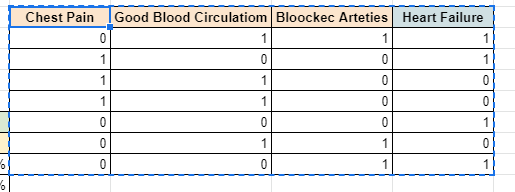

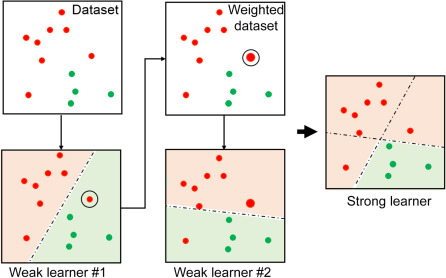

##### [Decision Trees Josh Starmer](https://www.youtube.com/watch?v=7VeUPuFGJHk)
<a id="decissiontrees001"></a>

1. Can be built based on yes or no questions
2. Can be built on numeric data.
3. There are Top Nodes(One), Internal nodes and Leaves or leaf nodes.

Question: How do you decide if _chest pain_ or _good blood circulation_ or _blocked arteries_ is important??

1. If chest pain and heart failure values were similar as in if chest pain as __NO__ and heart failure was __NO__ and likewise for yes, then we can call chest pain as pure node. 
2. But mostly be have impure nodes. 

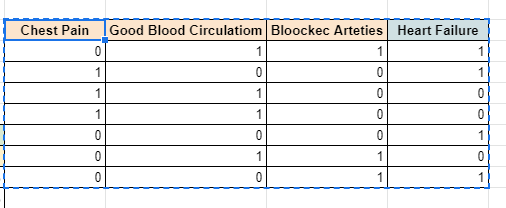

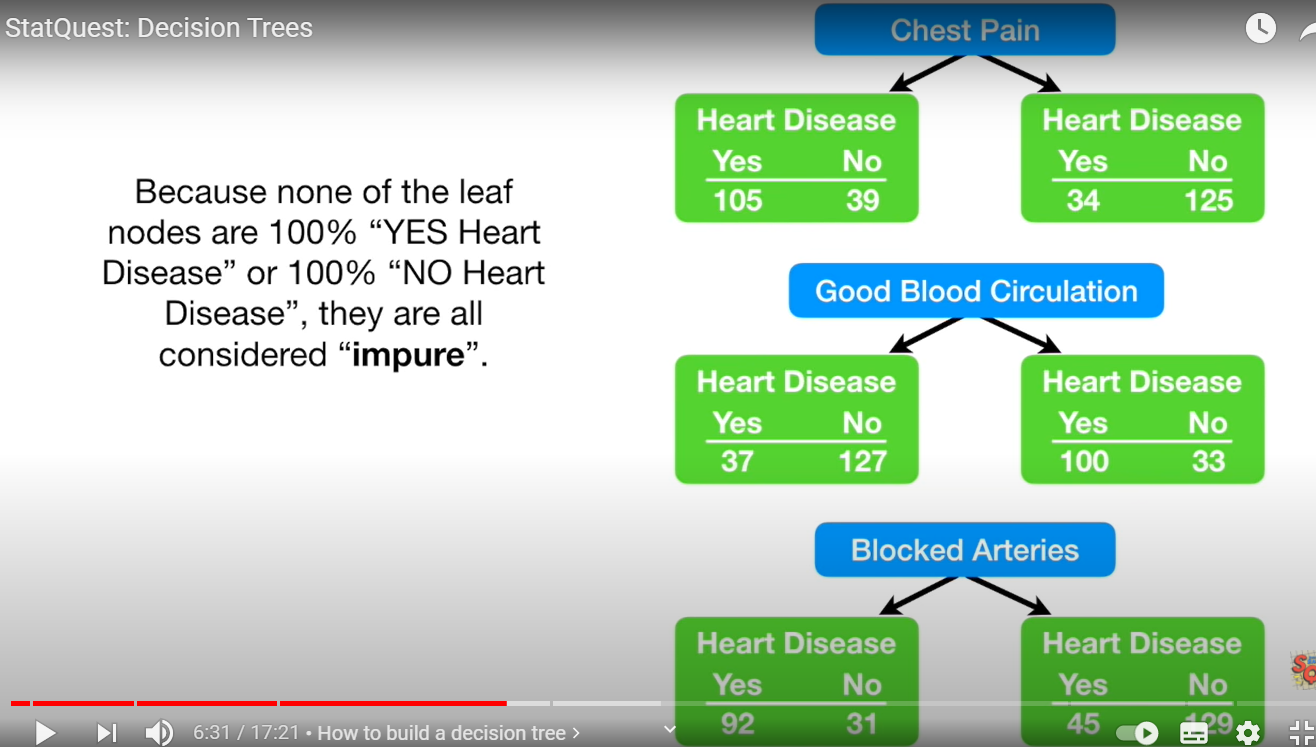

For chest pain the  gini impurity is = 1 - (probability of __YES__)^2 - (probability of __NO__)^2

This is for chest pain __YES__ <BR>
GINI Impurity = $$ 1 - (\frac{105}{(105+39)})^2 - (\frac{39}{(105+39)})^2  = 0.395 $$

This is for chest pain __NO__ <BR>
GINI Impurity = $$ 1 - (\frac{34}{(34+125)})^2 - (\frac{125}{(34+125)})^2  = 0.336 $$

For chest pain the GINI impurity is weighted averages of both leaf nodes <br>

$$ = \frac{((105+39)*0.395 + (34+125)*0.336)}{(105+39+34+125)} $$

In [29]:
## 1 - (\frac{105}{(105+39)})^2 - (\frac{39}{(105+39)})^2  = 0.395
## = \frac{((105+39)*0.395 + (34+125)*0.336)}{(105+39+34+125)}
## 1 - (\frac{34}{(34+125)})^2 - (\frac{125}{(34+125)})^2  = 0.336

The same is done for Good blood circulation and blocked arteries, whichever has the lowest GINI impurity we consider it. 

1. The tree is grown either till all the variables are exhausted in this case Good Circulation -> Blocked arteties -> Chest pain and we the leaves 17/3 and 7/22.
2. If the gini impurity of the node is lower than its leaves then we consider the node as a leaf. In the below images, we see that 0.29 is the impurity of the leaf but 0.2 for the node. So we keep the node.  

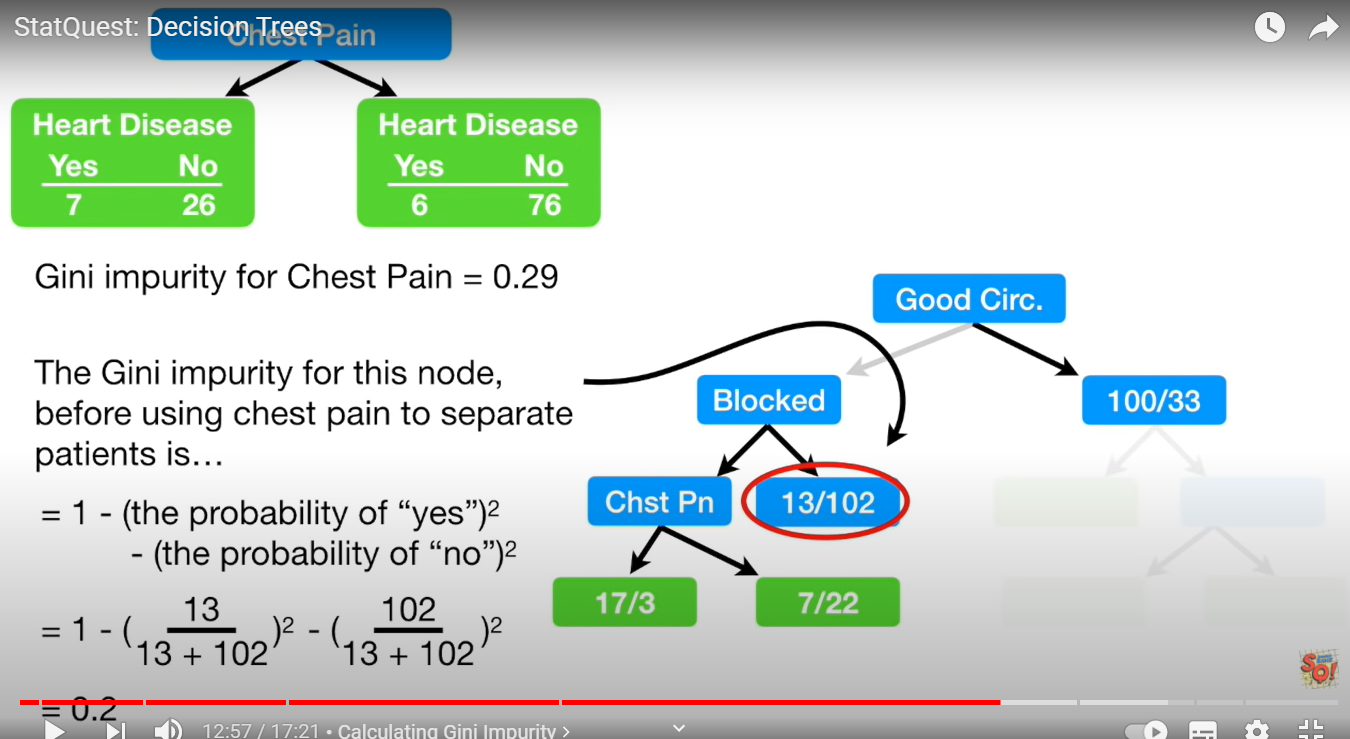

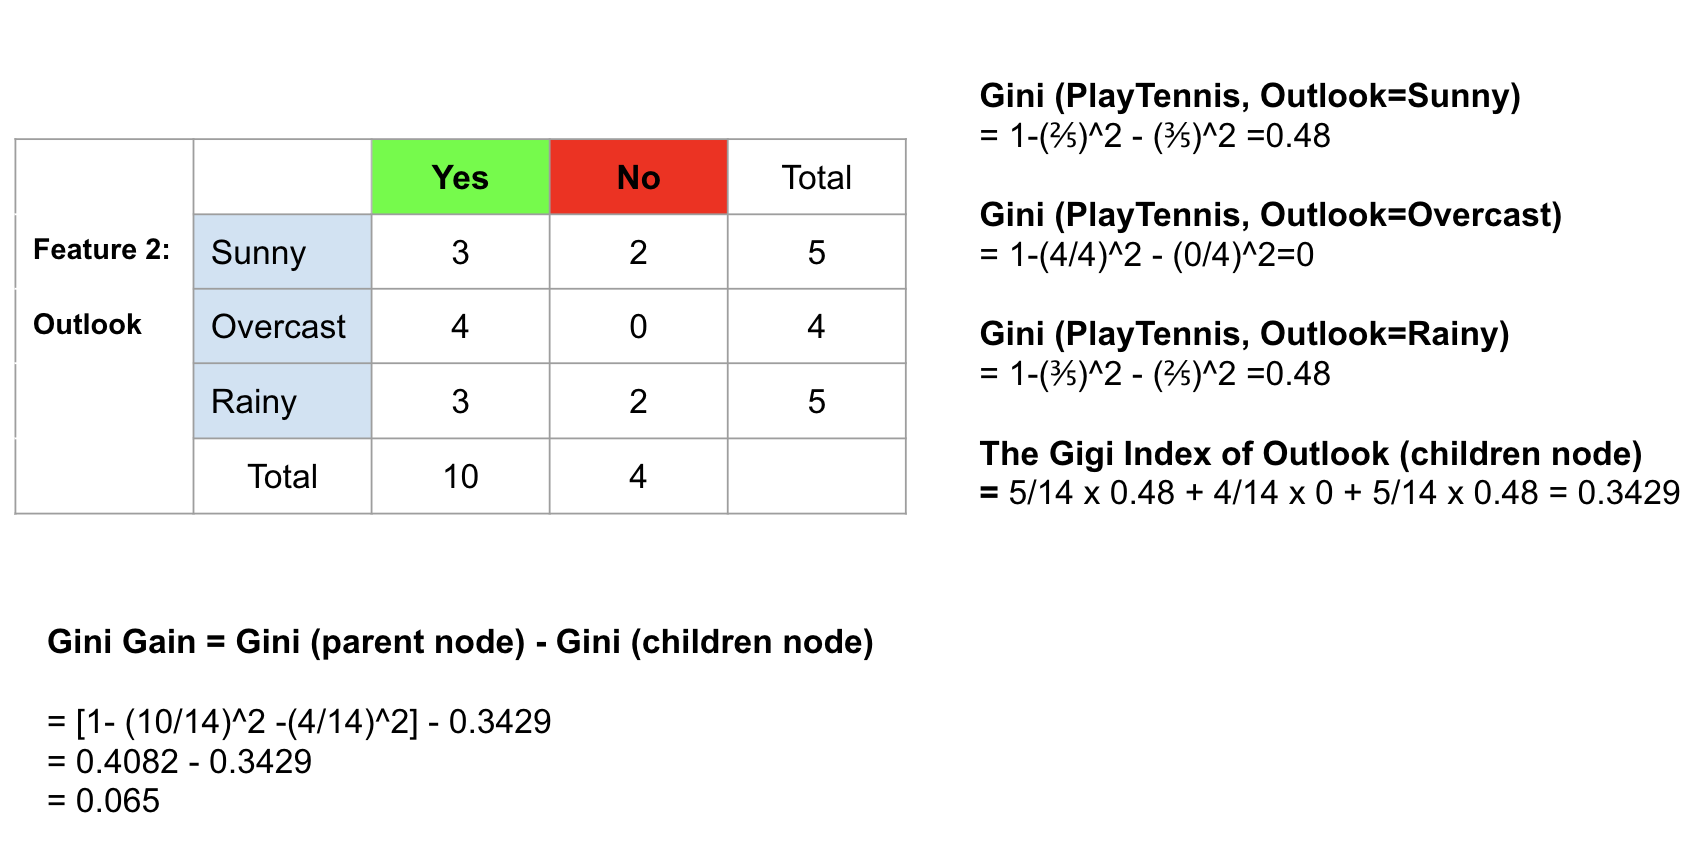

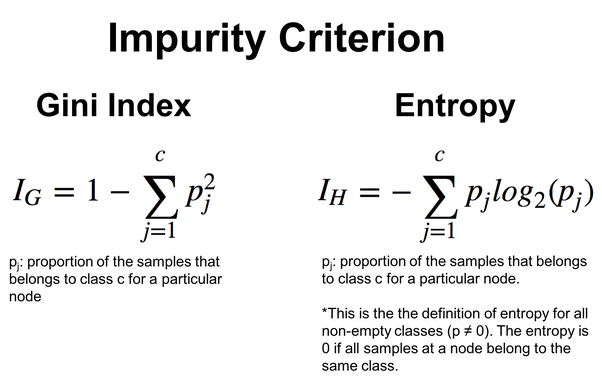

If the data is numeric:
1. We sort the data in ascending order. 
2. We calculate the mean. 
3. For this mean we calculate the GINI impurity value, say weights less than 167.5 and greater than 167.5. <br>
LEFT NODE
$$1- (\frac{0}{0+1})^2 - (\frac{1}{0+1})^2 $$
RIGHT NODE
$$1- (\frac{3}{3+1})^2 - (\frac{1}{3+1})^2 $$
Consider the weighted gini of both the leaves<br>
4. The lowest impurity values is the numerical divider. 

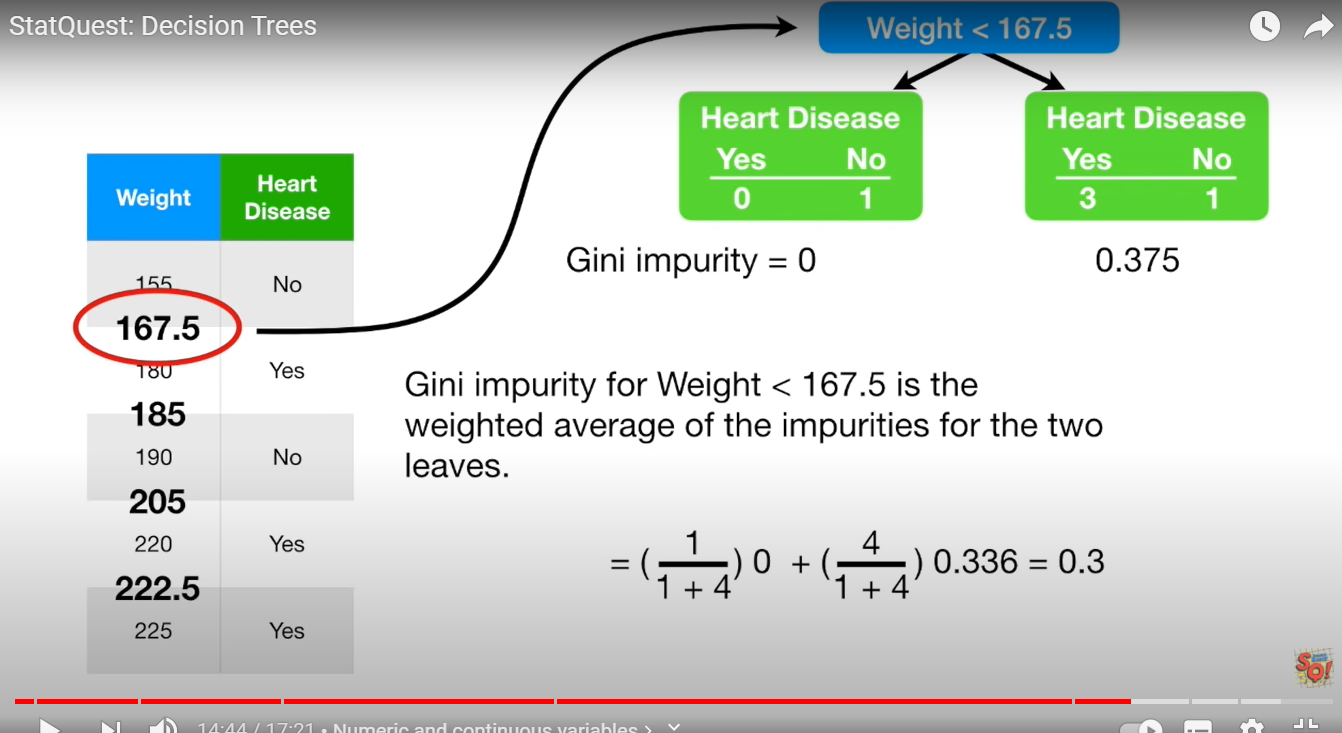

[Question](https://www.youtube.com/watch?v=wpNl-JwwplA): How does decision tree handle missing data - Josh Starmer?
> For missing data we can consider similar columns, and then run a regression on it. Or else we can consider the mean or median values of the same column. 

Advantages of Decision Tree

1. Clear Visualization: The algorithm is simple to understand, interpret and visualize as the idea is mostly used in our daily lives. Output of a Decision Tree can be easily interpreted by humans.

2. Simple and easy to understand: Decision Tree looks like simple if-else statements which are very easy to understand.

3. Decision Tree can be used for both classification and regression problems.

4. Decision Tree can handle both continuous and categorical variables.

5. No feature scaling required: No feature scaling (standardization and normalization) required in case of Decision Tree as it uses rule based approach instead of distance calculation.

6. Handles non-linear parameters efficiently: Non linear parameters don't affect the performance of a Decision Tree unlike curve based algorithms. So, if there is high non-linearity between the independent variables, Decision Trees may outperform as compared to other curve based algorithms.

7. Decision Tree can automatically handle missing values.

8. Decision Tree is usually robust to outliers and can handle them automatically.

9. Less Training Period: Training period is less as compared to Random Forest because it generates only one tree unlike forest of trees in the Random Forest. 

Disadvantages of Decision Tree

1. Overfitting: This is the main problem of the Decision Tree. It generally leads to overfitting of the data which ultimately leads to wrong predictions. In order to fit the data (even noisy data), it keeps generating new nodes and ultimately the tree becomes too complex to interpret. In this way, it loses its generalization capabilities. It performs very well on the trained data but starts making a lot of mistakes on the unseen data. __If we keep a threshold GINI impurity large enough, then the tree can generalise better.__


2. High variance: As mentioned in point 1, Decision Tree generally leads to the overfitting of data. Due to the overfitting, there are very high chances of high variance in the output which leads to many errors in the final estimation and shows high inaccuracy in the results. In order to achieve zero bias (overfitting), it leads to high variance. 

3. Unstable: Adding a new data point can lead to re-generation of the overall tree and all nodes need to be recalculated and recreated. 

4. Affected by noise: Little bit of noise can make it unstable which leads to wrong predictions.

5. Not suitable for large datasets: If data size is large, then one single tree may grow complex and lead to overfitting. So in this case, we should use Random Forest instead of a single Decision Tree.

[Pruning Decision Trees](https://www.youtube.com/watch?v=D0efHEJsfHo)

##### [Gradient Boosted regression trees p1](https://www.youtube.com/watch?v=3CC4N4z3GJc&t=25s)<br>
<a id = "gradientboost001"></a>
[P2](https://www.youtube.com/watch?v=2xudPOBz-vs)<br>
[P3](https://www.youtube.com/watch?v=jxuNLH5dXCs)<br>
[How to prune regression trees](https://www.youtube.com/watch?v=D0efHEJsfHo&t=2s)<br>

1. For Regression Analysis, we predict a continuous variable. 
2. The GB algo tries to reduce the residaul error with a small step size, there is empherical data to prove that, when this is done with a low learning rate, the model will counter overfitting, basically it has less variance and will generalize well to unseen data. 
3. The first prediction is the average of all the label values. In the below example it is 71.2 Kg. 
4. We fine the residuals i.e. actuals-avg_predictions, in GB this is called _pseudo residuals_.
5. Next we use all the feature to predict the residuals.(predict the pseduo residuals.)
6. Now using the previous mean_prediction and the new residual prediction, we get the prediction for the first sample i.e. 71.2+16.8 = 88. This is same the initial value. So this leads to over fitting. Meaning low bias and probably very high variance.
7. To tackle overfitting, a small learning rate is added. So the new prediction is 71.2+16.8*0.1. And the new residual prediction is 88- (71.2+16.8*0.1) = 15.1
8. Prediction are calcualted by adding the mean prediction + summation to n (learning rate * residuals)
9. New residuals are predicted and added again to the previous values i.e. to the chain of trees. 
10. This goes on till the residual sizes stop decreasing significantly or we have given the number of max trees parameter. 


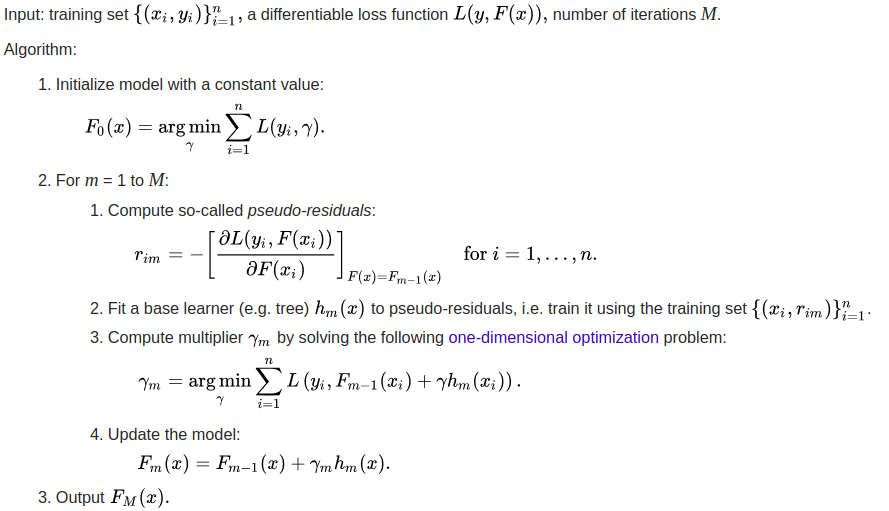

Usually, there are about 8-32 leaves.<br>
For height < 1.6, we consider the average of -14.2 and -15.2 to get the predicted value. 

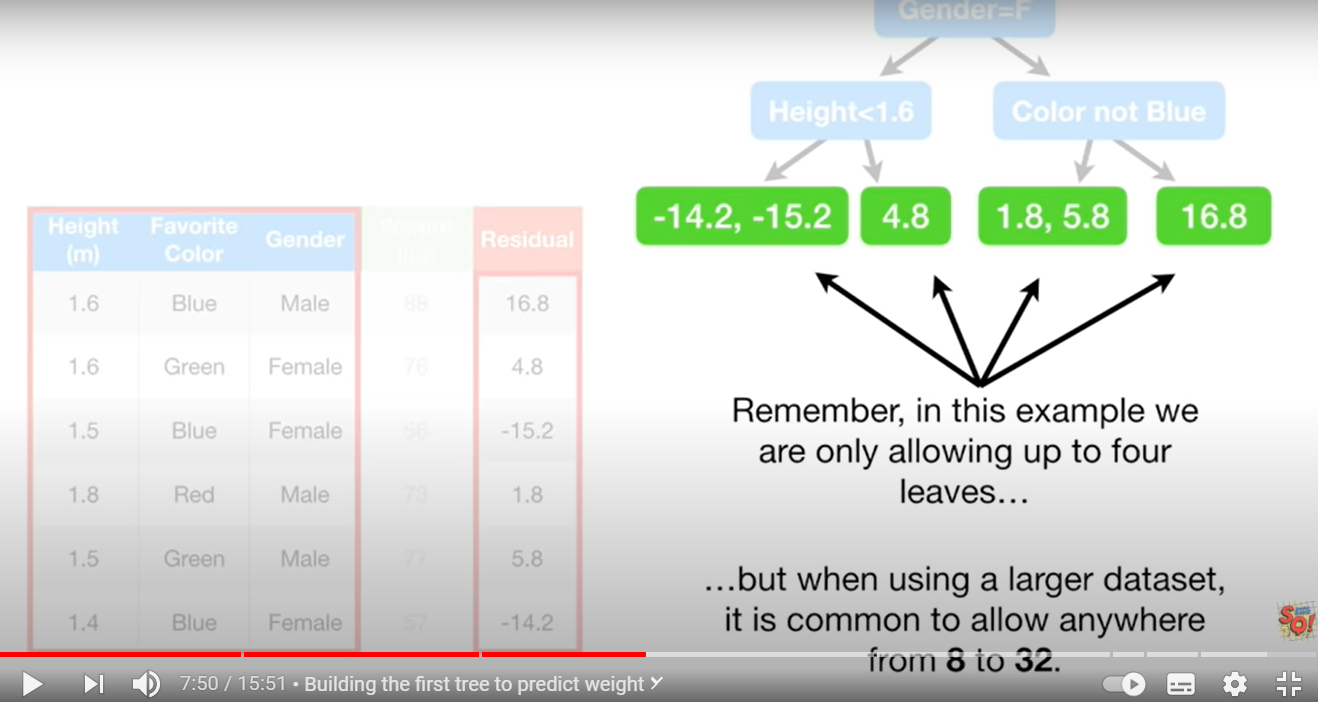

In [8]:
## Average of Y_acutals
from functools import reduce

def Average(lst):
    return reduce(lambda a, b: a + b, lst) / len(lst)
Average([88,76,56,73,77,57])

71.16666666666667

In [32]:
## STEP ONE 
## The mean of labels.
import pandas as pd

df_gb_calc = pd.DataFrame({"features":[1,2,3,4,5,6],"lables":[88,76,56,73,77,57], "mean_prediction":[71.2,71.2,71.2,71.2,71.2,71.2]})
df_gb_calc

,features,lables,mean_prediction
0,1,88,71.2
1,2,76,71.2
2,3,56,71.2
3,4,73,71.2
4,5,77,71.2
5,6,57,71.2


In [33]:
## STEP TWO 
## Find the residuals
df_gb_calc["residuals"] = df_gb_calc.lables - df_gb_calc.mean_prediction
display(df_gb_calc)

,features,lables,mean_prediction,residuals
0,1,88,71.2,16.8
1,2,76,71.2,4.8
2,3,56,71.2,-15.2
3,4,73,71.2,1.8
4,5,77,71.2,5.8
5,6,57,71.2,-14.2


In [38]:
## NEXT STEP
## These are the predicted residuals, ignore then math here. 
## Basically after the mean prediction, 

## this residual_predicted is predicted using the residuals
import numpy as np

residual_prediction_xg_boost = [16.8, 4.8, -15, 4,4,-15] 
df_gb_calc["residuals_predicted_001"] = residual_prediction_xg_boost
# df_gb_calc.insert(loc=0, column='residuals_predicted_001', value=residual_prediction_xg_boost)


## 
df_gb_calc["learning_rate"] = 0.1
df_gb_calc["residuals_improved_001"] = df_gb_calc.apply(lambda x : (x.lables - \
                                                                    (x.mean_prediction+ x.learning_rate*x.residuals_predicted_001)), axis = 1)

display(df_gb_calc)

,features,lables,mean_prediction,residuals,residuals_predicted_001,learning_rate,residuals_improved_001
0,1,88,71.2,16.8,16.8,0.1,15.12
1,2,76,71.2,4.8,4.8,0.1,4.32
2,3,56,71.2,-15.2,-15.0,0.1,-13.70
3,4,73,71.2,1.8,4.0,0.1,1.40
4,5,77,71.2,5.8,4.0,0.1,5.40
5,6,57,71.2,-14.2,-15.0,0.1,-12.70


1. We can see that the new residuals are improved ones from the previous. The new residual values are lower.  <br>
2. New prediction are calculated as below: <br>
3. __x.mean_prediction + x.residuals_predicted_001*x.learning_rate+x.learning_rate*.residuals_improved_001__   <br>
4. The above calculation goes on and on till the max trees parameter is reached or we see no significant improvement in residuals

In [39]:
## Calcualting the new prediction

df_gb_calc["new_prediction"] = df_gb_calc.apply(lambda x : (x.mean_prediction + \
                                                                    (x.residuals_predicted_001*x.learning_rate+ x.learning_rate*x.residuals_improved_001)), axis = 1)
display(df_gb_calc)

,features,lables,mean_prediction,residuals,residuals_predicted_001,learning_rate,residuals_improved_001,new_prediction
0,1,88,71.2,16.8,16.8,0.1,15.12,74.392
1,2,76,71.2,4.8,4.8,0.1,4.32,72.112
2,3,56,71.2,-15.2,-15.0,0.1,-13.70,68.330
3,4,73,71.2,1.8,4.0,0.1,1.40,71.740
4,5,77,71.2,5.8,4.0,0.1,5.40,72.140
5,6,57,71.2,-14.2,-15.0,0.1,-12.70,68.430


>__ValueError: arrays must all be same length__
We receive this error in pd.DataFrame when the lenght of the dict values, the list is not of same lenght<br>
_df_gb_calc = pd.DataFrame({"features":[1,2],"lables":[88,76,56,73,77,57], "residuals":[71.2,71.2,71.2,71.2,71.2,71.2]})_


> __AttributeError: 'Series' object has no attribute 'lables'__
When you use df.apply(), each row of your DataFrame will be passed to your lambda function as a pandas Series. The frame's columns will then be the index of the series and you can access values using series<br>
__df['D'] = (df.apply(lambda x: myfunc(x[colNames[0]], x[colNames[1]]), axis=1)) __
__axis = 1 was missing__


> __ValueError: cannot insert residuals_predicted_001, already exists__
While using df.insert <br>
df_gb_calc.insert(loc=0, column='residuals_predicted_001', value=residual_prediction_xg_boost)


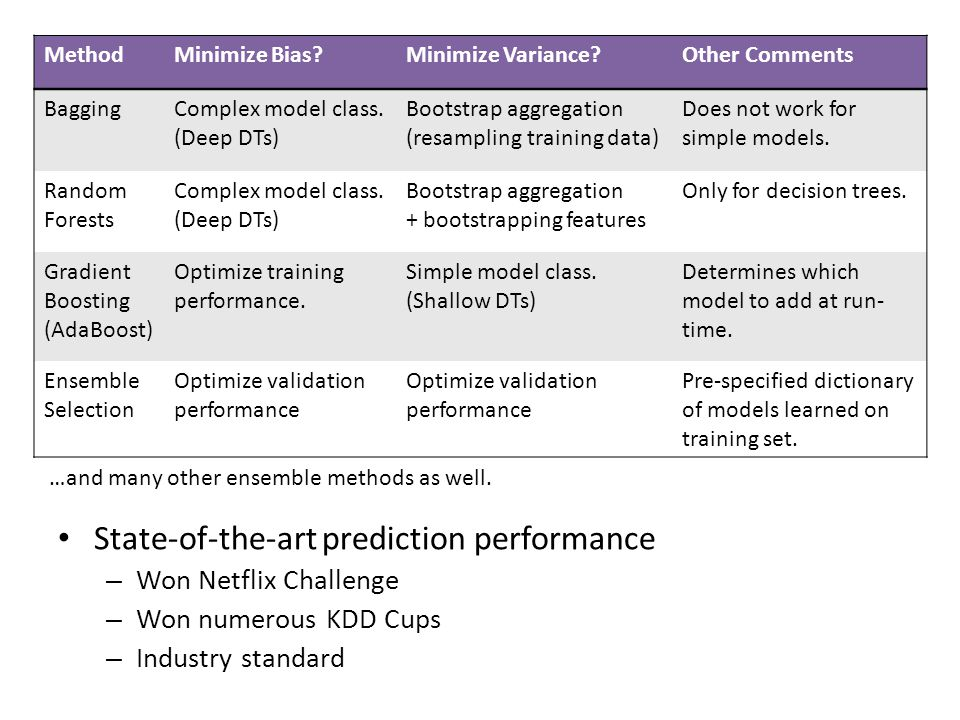

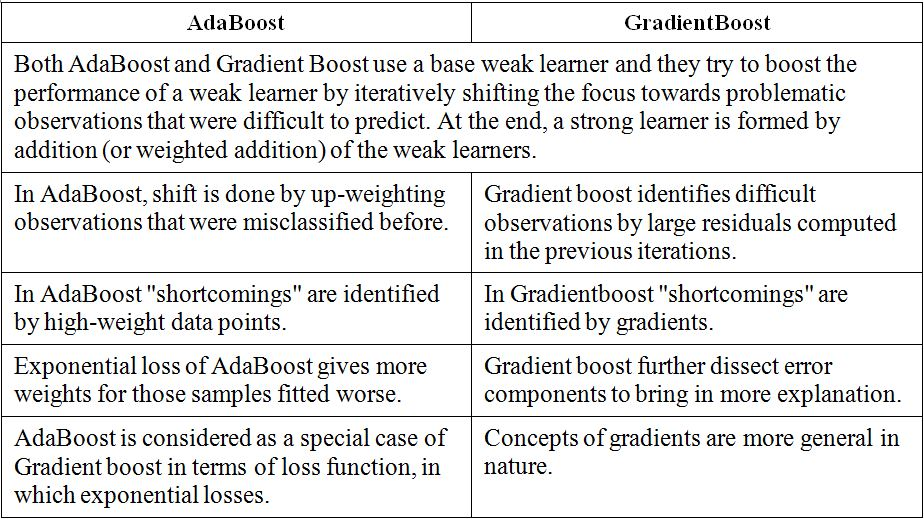


|S.No|Adaboost|Gradient Boost|
|---|---|---|
|1|An additive model where shortcomings of previous models are identified by high-weight data points.|An additive model where shortcomings of previous models are identified by the gradient.|
|2|	The trees are usually grown as decision stumps.|The trees are grown to a greater depth usually ranging from 8 to 32 terminal nodes.|
|3|	Each classifier has different weights assigned to the final prediction based on its performance.|All classifiers are weighed equally and their predictive capacity is restricted with learning rate to increase accuracy.|
|4|	It gives weights to both classifiers and observations thus capturing maximum variance within data.|It builds trees on previous classifier’s residuals thus capturing variance in data.|

##### [XGBOOST Josh Starmer](https://www.youtube.com/watch?v=OtD8wVaFm6E&t=35s)
<a id= "xgboosting001"></a>